# DATA 601: HW4

**Learning Objectives**

- Work with realworld datasets that can be represented using tabular data structures.
- Gain experience wrangling and organizing data using `pandas`.
- Produce visualizations summarizing information from tabular data.

_This is an individual homework assignment._ 

Please complete this homework assignment within the Jupypter notebook environment, and provide your answers where indicated.

#### Submission 

Your submission will be manually tested and graded. In order to ensure that everything goes smoothly, please ensure that: 

- your notebook runs on the Data Science Hub environment, 
- you have provided your solutions where asked without altering any other parts of this notebook,

_You do not need to submit the datasets provided for this homework._


## Dataset

In this homework, you will be working with a building utility usage dataset that contains usage data for six buildings at the University of Calgary over a period of three years. The data has been made available by the [Office of Sunstainability](https://www.ucalgary.ca/sustainability/campus-learning-lab) at the University of Calgary specifically for use in DATA 601. 

_Please do not share the data with anyone in any form_.

The original data is in excel format and contains a hierarchical index. For this assignment, you will be working with a slightly modified version where the building names have been anonymized and the hierarchical index has been flattended into a [tidy format](https://r4ds.had.co.nz/tidy-data.html). The resulting dataset is available on D2L in CSV format.

<!-- BEGIN QUESTION -->

## TASK 0

### Read the Dataset

- Please ensure that the data is available to you locally on the machine you are working on. 
- Read the data using `pandas`, display the head and tail of the data and familiarize yourself with the variables contained in the dataset. 

In [1]:
# Use this cell to collect package imports
import pandas as pd
import numpy as np
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4] # default size
plt.rcParams['figure.dpi'] = 150 #  increase the default pixel density used for matplotlib plots

In [2]:
# Read the data into a pandas dataframe and display the head and tail
df = pd.read_csv('data/Building Data.csv')
display(df.head(2))
display(df.tail(2))

,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
0,2018-10-01,B1,NaN,"4,920.66",6.39,"13,240.10","16,244.46",NaN,"1,319.45"
1,2018-10-01,B2,NaN,"4,258.32",89.69,"13,846.41","50,505.60",NaN,"2,427.78"


,Date,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh)
6574,2021-09-30,B5,"1,310.03",NaN,26.18,"2,111.07",NaN,988.89,0
6575,2021-09-30,B6,"1,523.97",NaN,1.0,"3,263.78",NaN,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      6576 non-null   object
 1   Building                  6576 non-null   object
 2   Chilled Water (kWh)       4384 non-null   object
 3   Cooling (kWh)             2192 non-null   object
 4   Domestic Cold Water (m3)  6572 non-null   object
 5   Electricity (kWh)         6576 non-null   object
 6   Heating (kWh)             2192 non-null   object
 7   Heating Water (kWh)       4384 non-null   object
 8   Natural Gas (kWh)         6576 non-null   object
dtypes: object(9)
memory usage: 462.5+ KB


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 1

### Data Wrangling

At this stage, it might be helpful to do some data cleaning and wrangling to facilitate the tasks below. 

- Ensure that the numerical values are read in properly. If not, please use an appropiate numerical type to represent columns that contain numerical quantities.
- The `Date` column contains year, month and day information that needs to be parsed as such so that the data can be inspected at yearly, monthly and daily granularities. There are multiple ways of doing this; one way is to separate the year, month and day out into separate columns. You can also build a hierarchical row index with year, month and day as different levels of the index. 
 
 You may find [`pandas.to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) helpful for this task.
 Please also have a look at the documentation for [`pandas.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Some helpful type conversions and cleanup can be performed by pandas at the data read stage.

In [4]:
# Use this cell to do any data type conversions. Alternatively, you may want to pass in appropriate 
# arguments when reading in data above to ensure that the types are inferred correctly.

# Do any conversions needed and then print out the `dtypes` for the non-date columns. 
df = pd.read_csv('data/Building Data.csv', thousands=',') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6576 non-null   object 
 1   Building                  6576 non-null   object 
 2   Chilled Water (kWh)       4384 non-null   float64
 3   Cooling (kWh)             2192 non-null   float64
 4   Domestic Cold Water (m3)  6572 non-null   float64
 5   Electricity (kWh)         6576 non-null   float64
 6   Heating (kWh)             2192 non-null   float64
 7   Heating Water (kWh)       4384 non-null   float64
 8   Natural Gas (kWh)         6576 non-null   float64
dtypes: float64(7), object(2)
memory usage: 462.5+ KB


In [5]:
# Use this cell to do any wrangling on the date column. Then display the resulting dataframe
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['year'] = df.index.map(lambda row: row.year)
df['month'] = df.index.map(lambda row: row.month)
df['dom'] = df.index.map(lambda row: row.day)
df['day_name'] = df.index.map(lambda row: row.strftime("%A"))
df['month_name'] = df.index.map(lambda row: row.strftime("%B"))
df['dow'] = df.index.map(lambda row: row.weekday())

display(df.head(2))

,Building,Chilled Water (kWh),Cooling (kWh),Domestic Cold Water (m3),Electricity (kWh),Heating (kWh),Heating Water (kWh),Natural Gas (kWh),year,month,dom,day_name,month_name,dow
Date,,,,,,,,,,,,,,
2018-10-01,B1,NaN,4920.66,6.39,13240.10,16244.46,NaN,1319.45,2018,10,1,Monday,October,0
2018-10-01,B2,NaN,4258.32,89.69,13846.41,50505.60,NaN,2427.78,2018,10,1,Monday,October,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 2

### Exploring the Data for 2019

For this task, you will be working with usage data for the year 2019. For the year 2019, manipulate your dataframe to extract and visualize the following information:
1. Electricity usage per building for the entire year.
2. Total energy usage per building for the entire year. To determine total energy usage, add the variables that are in `kWh` units.
3. Box plots showing the daily energy usage (aggregated over the buildings) per month. As in the previous task, add the variables that are in `kWh` units to determine daily totals. 

For the tasks above where the type visualization is not clearly spelled out,  please choose an appropriate visualization that clearly shows the requested information. Please also ensure that you provide appropriate labels/legends/colorbars so that your visualizations are readable and self-contained.

In [6]:
energy_cols = [col for col in df.columns if 'kWh' in col] # list of all columns that contain 'kWh' gives me list of all energy cols
df['Total energy (kWh)'] = df[energy_cols].sum(axis=1) # total energy is sum of all types of energies

# Solution for 1.
df2019 = df[df['year']==2019] # subset 2019
df2019_electricity = df2019.groupby('Building')[['Electricity (kWh)', 'Total energy (kWh)']].sum()
df2019_electricity

,Electricity (kWh),Total energy (kWh)
Building,,
B1,4178192.04,11219206.15
B2,9172640.37,20218399.92
B3,1669895.96,6198993.32
B4,2668782.35,5751404.75
B5,671564.38,1681844.76
B6,1277728.52,6511199.51


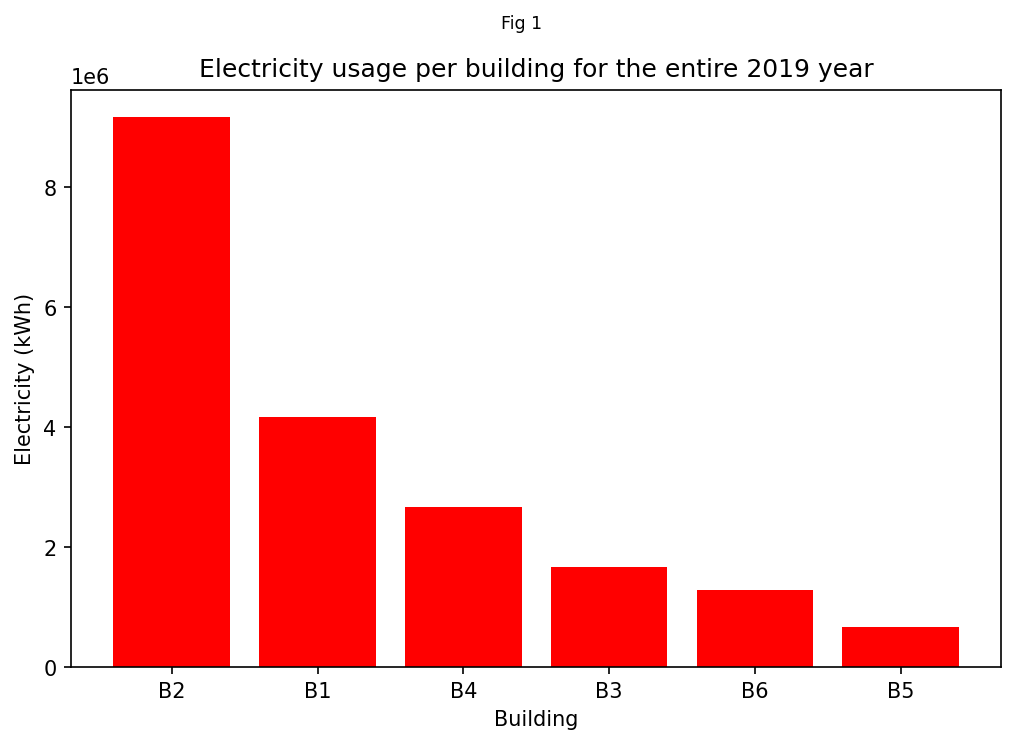

In [7]:
fig = plt.figure(figsize=(8,5))

df2019_electricity.sort_values(by='Electricity (kWh)', ascending=False, inplace=True) # sort
plt.bar(df2019_electricity.index, df2019_electricity['Electricity (kWh)'], color ='red')
# Decoration 
plt.xlabel('Building')
plt.ylabel('Electricity (kWh)')
plt.title('Electricity usage per building for the entire 2019 year')
plt.suptitle('Fig 1', fontsize='small')
plt.show()

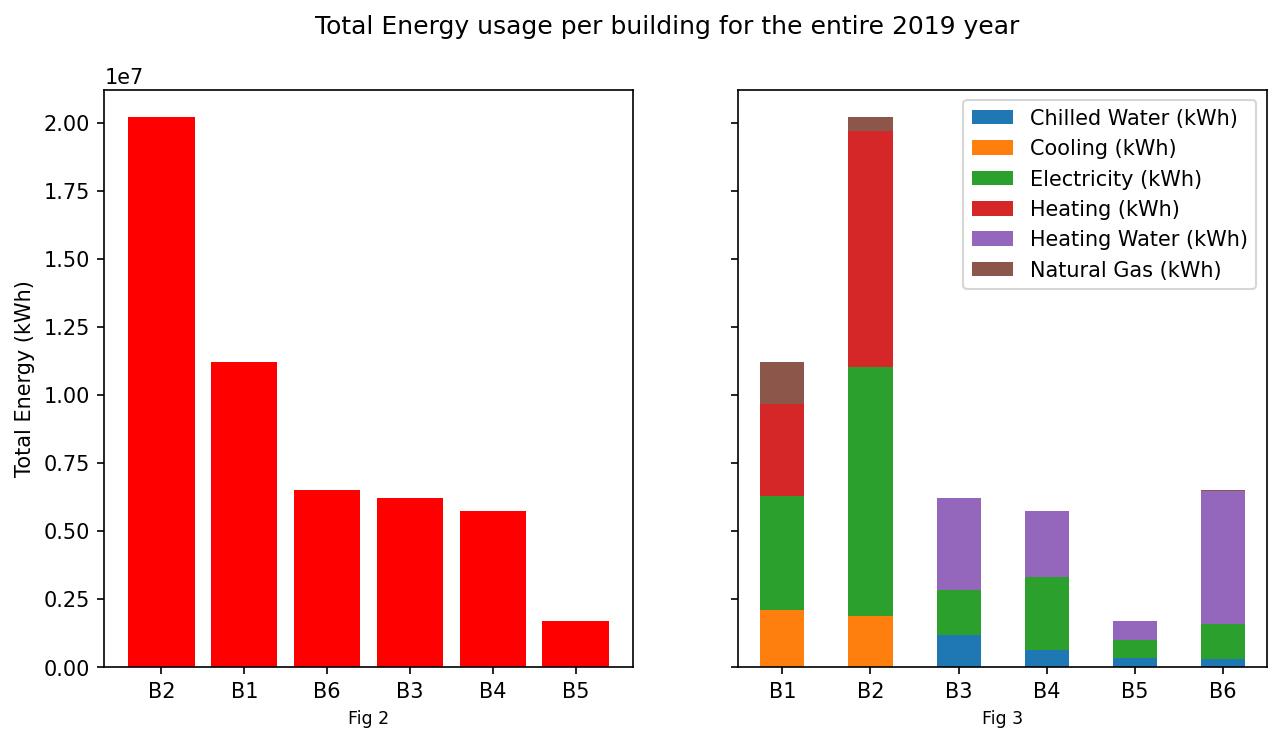

In [8]:
# Solution for 2.
df2019_stacked = df2019.groupby('Building')[energy_cols].sum()
df2019_electricity.sort_values(by='Total energy (kWh)', ascending=False, inplace=True)
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.bar(df2019_electricity.index, df2019_electricity['Total energy (kWh)'], color ='red')
df2019_stacked.plot(ax=ax2, kind='bar', stacked=True, rot=0)
# Decoration
ax1.set_xlabel('Fig 2', fontsize='small')
ax2.set_xlabel('Fig 3', fontsize='small')
ax1.set_ylabel("Total Energy (kWh)")
plt.suptitle("Total Energy usage per building for the entire 2019 year")
plt.show()

**Insights**:

_From Fig 2_

1. B2 used _the most_ energy for the period;

2. B1 followed but _two times behind_ the "leader";

3. B3, B4, B6 used the _approximately same amount_ of energy;

4. B5 used _the least_ amount of energy;

_From Fig 3_

5. B1 and B2 used mostly `Electricity` and `Heating` combined with some Cooling and Natural Gas. No usage of Chilled Water and Heating Water. 

6. On the contrary, B3, B4, B5, B6 have not used Natural Gas and Heating. But mostly `Heating Water`, Electricity and some Chilled Water.

7. _All_ buildings used `Electricity` extensively. 

<Figure size 900x600 with 0 Axes>

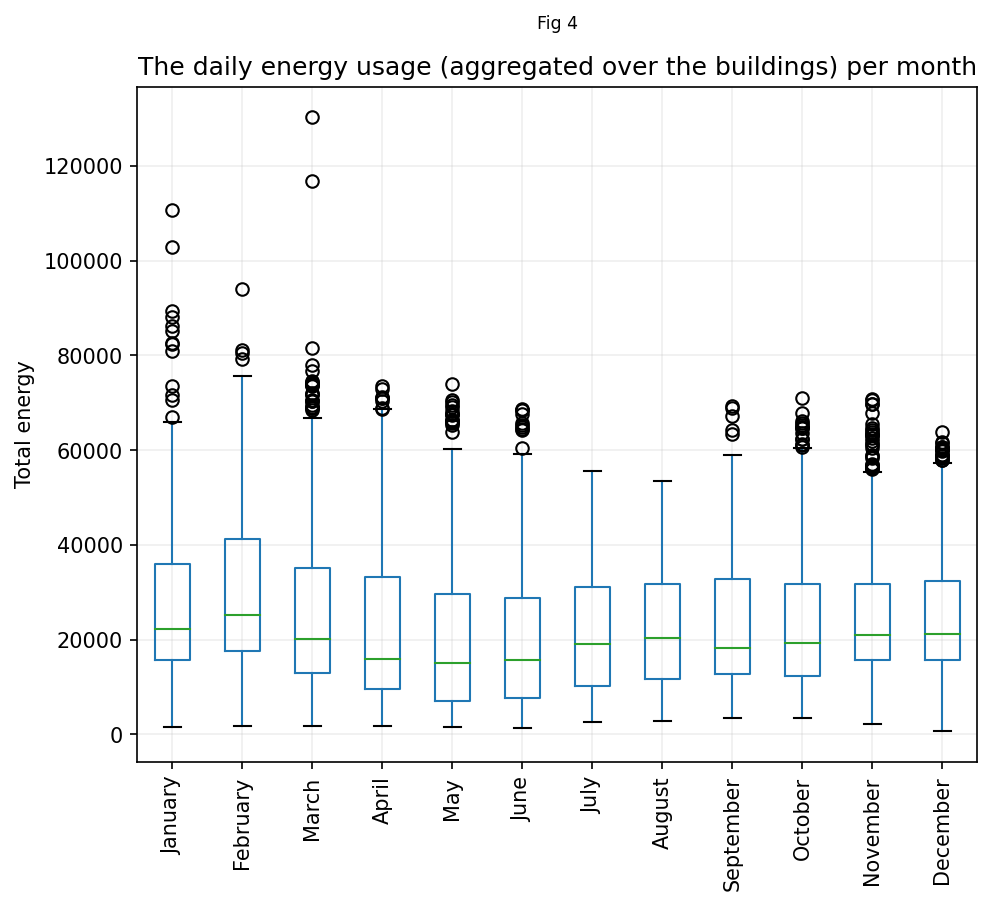

In [9]:
# Solution for 3.
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Plot
plt.figure()
plot = df.boxplot(column='Total energy (kWh)', by='month', rot=90, figsize=(7,6))
# Decorations
plt.title('The daily energy usage (aggregated over the buildings) per month')
plt.suptitle('Fig 4', fontsize='small')
plot.set_xticklabels(month_names)
plot.set_xlabel('')
plot.set_ylabel('Total energy')
plt.grid(alpha=0.2)
plt.show()

**Insights**:

_From Fig 4_

1. The **median** shows the yearly _cyclical_ nature of energy usage.
    
    a. The gradual rise starts in September and peaks in February;
    
    b. Then it bottoms in May and June.

2. The daily energy usage is mostly **spread out** during _cold months_ (September - March). Probably, because of the greater need for energy usage and uneven temperature due to specific Alberta's weather conditions, such as chinook and cold winters. 
    
    a. That is when we find most **outliers** - minus 40 degrees is a real thing, not a myth :) 


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## TASK 3

### Exploring trends over time

You may approach this task however you see fit. We expect appropriate use of visualizations and summary statistics, and textual explanations of your approach and findings following your code.

Consider the energy usage for each building over the entire timeframe available. Address the following questions:
- How does use of natural gas and electricity compare between buildings? Comment on magnitude and variance of usage.
- Can you identify any impacts of the pandemic on energy usage? Reflect on why/why not.

<Figure size 900x600 with 0 Axes>

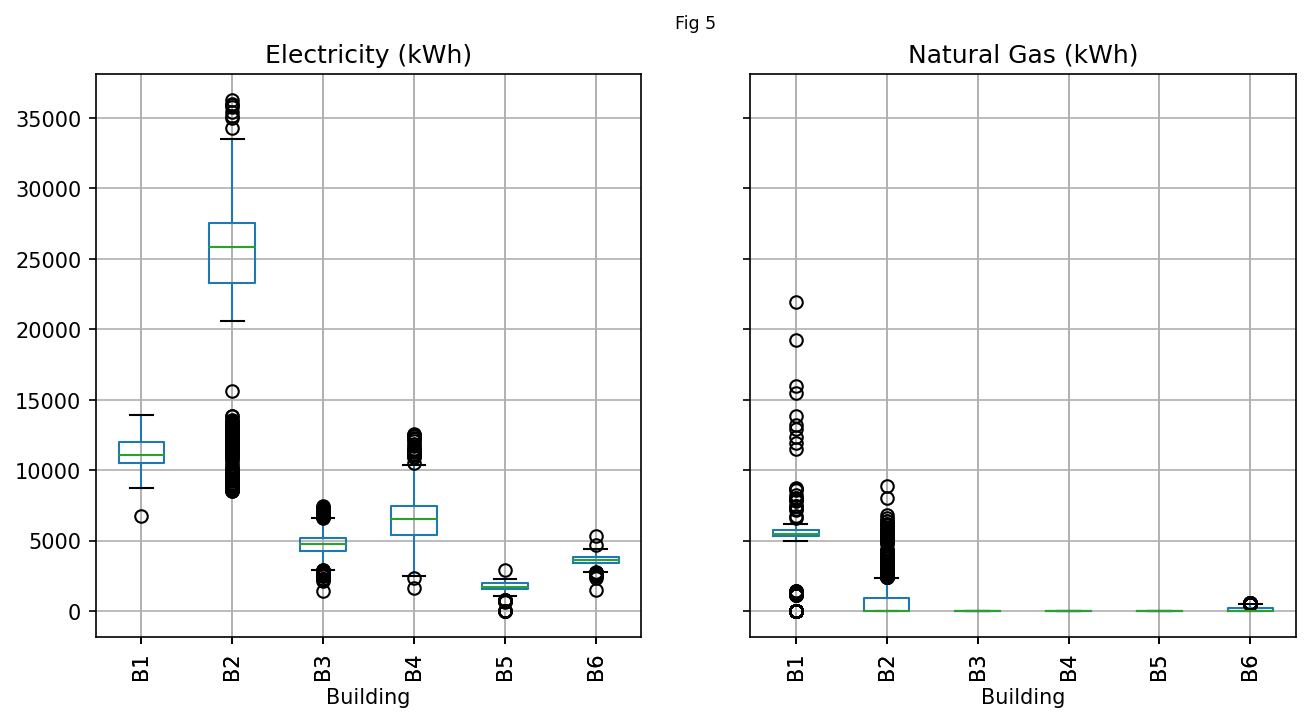

In [10]:
# Solution for 1.
fig = plt.figure()
df.boxplot(figsize=(10,5), column=['Electricity (kWh)', 'Natural Gas (kWh)'], by='Building', rot=90)
plt.suptitle('Fig 5', fontsize='small')
plt.show()

**Insights**:

_From Fig 2 and Fig 5_

1. _All_ buildings used `Electricity` extensively. Particularly B2. 

2. `Natural Gas` was used _much less_. Buildings such as B3, B4, B5 haven't used this kind of energy at all. 

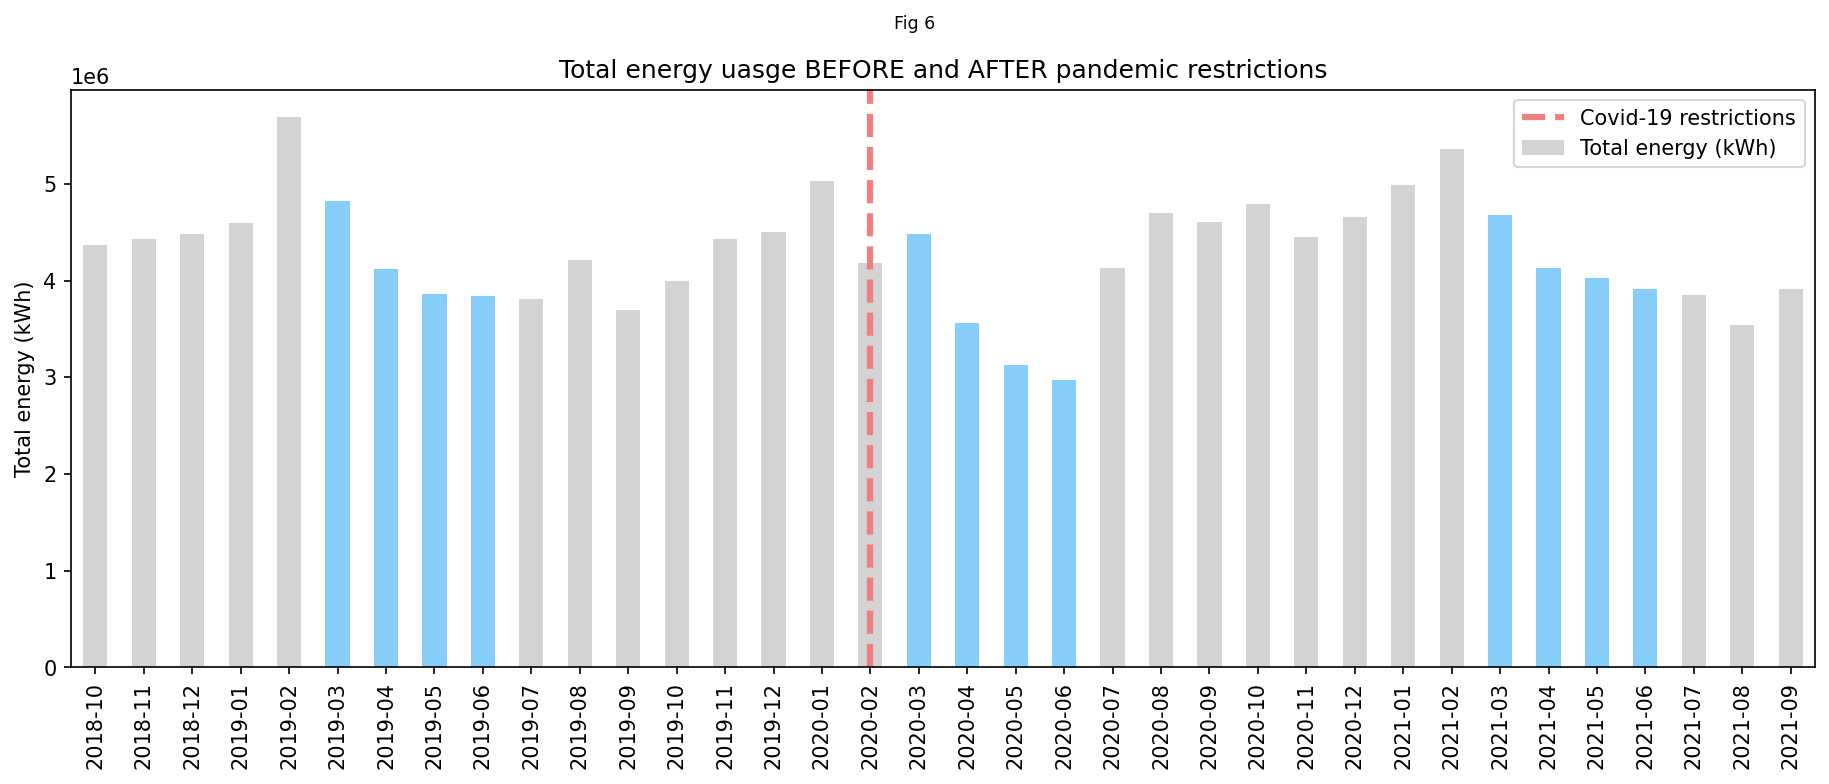

In [11]:
# Solution for 2.
# Annual precipitation for all the data

annual = df.groupby(['year', 'month'])['Total energy (kWh)'].sum()

# Changing date index for better plotting experience
annual = annual.reset_index(level=[0,1])
annual['timeindex'] = annual['year'].astype(str) + '-' + annual['month'].astype(str)
annual['timeindex'] = pd.to_datetime(annual['timeindex']).dt.strftime('%Y-%m')
annual.set_index('timeindex', inplace=True)
# Plotting
clrs = ['lightskyblue' if x in [3,4,5,6] else 'lightgray' for x in annual['month']]
annual['Total energy (kWh)'].plot(figsize=(15,5), kind='bar', color=clrs, width=0.5)
plt.axvline(annual.index.searchsorted('2020-02'), color='lightcoral', linestyle='--', lw=3, label='Covid-19 restrictions')
# Decorations
plt.title('Total energy uasge BEFORE and AFTER pandemic restrictions')
plt.suptitle('Fig 6', fontsize='small')
plt.xlabel('')
plt.ylabel('Total energy (kWh)')
plt.legend(loc='upper right')
plt.show()

**Insights**:

_from Fig 6_

1. There was _no significant impact_ on `Total energy` usage after Covid-19 restrictions were introduced.

2. The height of bars after Feb 2020 is lower, but it is mainly due to _seasonal_ effects. The same effect can be found in the 2019 and 2021 years (March, April, May and June are color coded 'lightblue' to better see that declining energy consumption is mostly a seasonal effect).
    
    2a. With that being said, the _declining rate in 2020 is higher_ compare to 2019 and 2021 years. Probably, due to both seasonal reasons and Covid-19 restrictions. 

Let's examine if some particular _kinds of energy_ reacted to this event.

Citation: [Covid updates in University of Calgary](https://www.ucalgary.ca/risk/emergency-management/covid-19-response)

Chilled Water (kWh)  Cooling (kWh)  Electricity (kWh)  \
year month                                                          
2018 10                37114.56      342866.78         1418787.53   
     11                13257.07      264898.18         1345871.07   
     12                13835.90      275665.58         1273584.86   
2019 1                 13704.00      236496.62         1351868.26   
     2                  6301.04      133019.11         1293780.68   

            Heating (kWh)  Heating Water (kWh)  Natural Gas (kWh)  
year month                                                         
2018 10        1523859.55            931611.84          116375.14  
     11        1625617.96           1108195.32           72565.37  
     12        1670201.36           1200112.05           50520.87  
2019 1         1725898.61           1251942.63           17372.23  
     2         2345676.86           1829454.26           81044.48

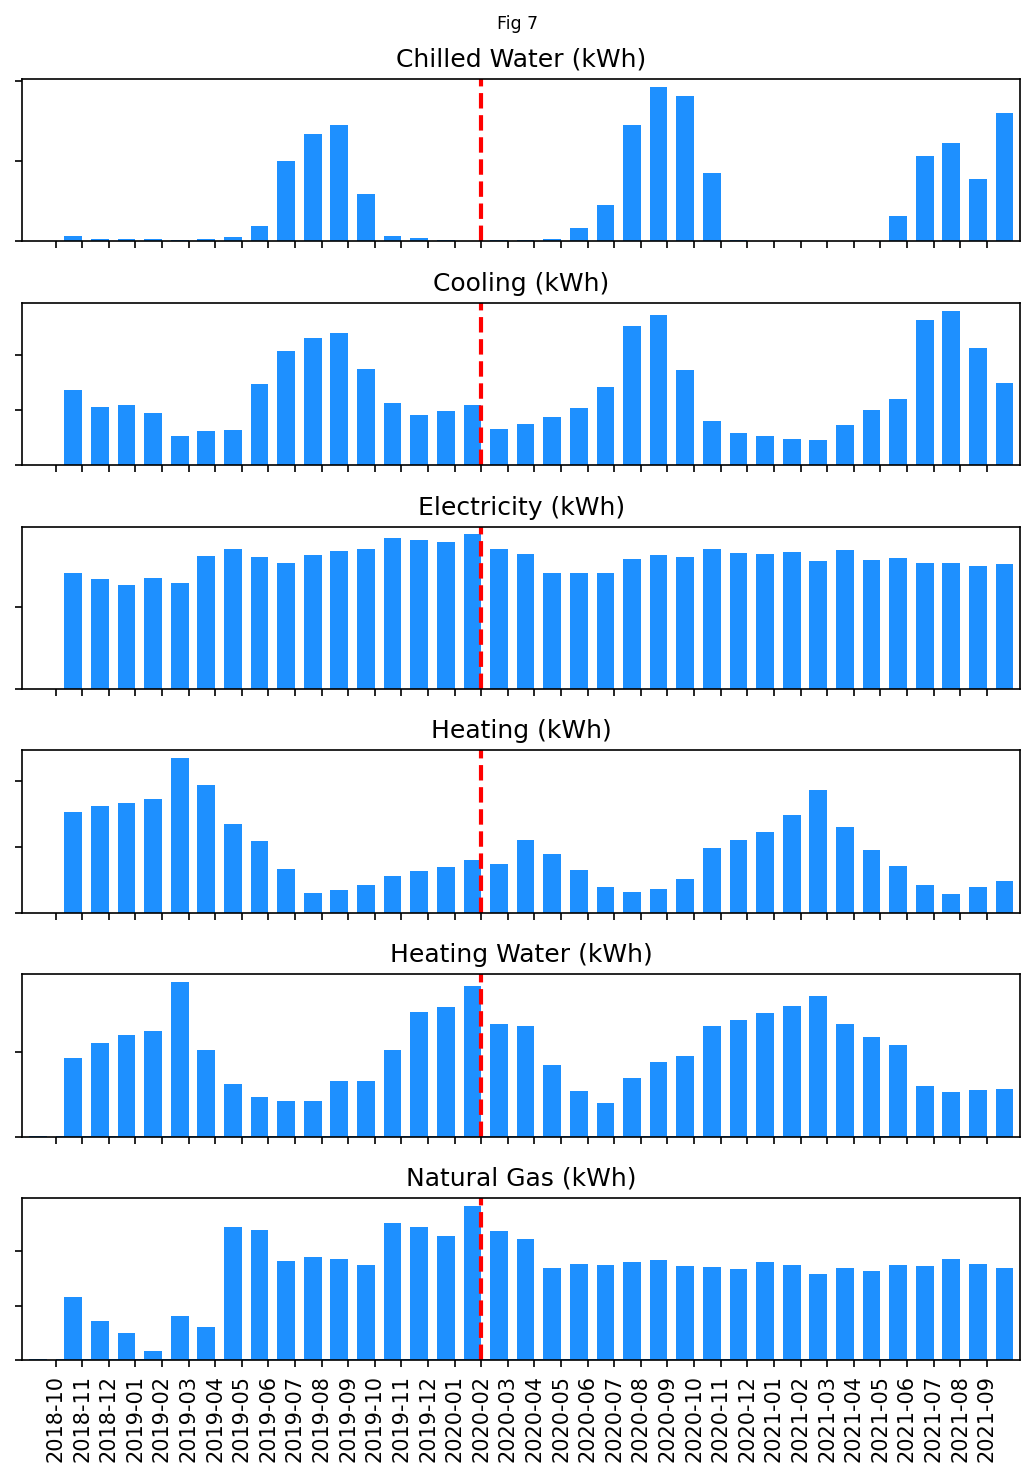

In [13]:
# Group
monthly_energy = df.groupby(['year', 'month'])[energy_cols].sum()
display(monthly_energy.head())

# define subplot grid
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(7, 10), tight_layout=True, sharex=True)

# loop through different energy cols and axes
for energy, ax in zip(energy_cols, axs.ravel()):
    # filter df for energy and plot on specified axes
    df_energy = monthly_energy.loc[:, energy]
    # Changing date index for better plotting experience
    df_energy = df_energy.reset_index(level=[0,1])
    df_energy['timeindex'] = df_energy['year'].astype(str) + '-' + df_energy['month'].astype(str)
    df_energy['timeindex'] = pd.to_datetime(df_energy['timeindex']).dt.strftime('%Y-%m')
    df_energy.set_index('timeindex', inplace=True)
    # bar plot
    df_energy.plot(ax=ax, kind='bar', color='dodgerblue', grid=False, width=2)
    # vertical line plot
    ax.axvline(df_energy.index.searchsorted('2020-02'), color='red', linestyle='--', lw=2) # vertical line when Covid started (restrictions)
    # Decorations
    ax.get_legend().remove()
    ax.set_title(energy)
    ax.set_xlabel('')
    ax.set_yticklabels('')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.suptitle('Fig 7', fontsize='small')
plt.show()

**Insights**:

_From Fig 7_

1. Electricity and Natural Gas dropped somewhat, but again primarily due to seasonal effects, as we transitioned from winter to spring.

    1a. Level of Natural Gas normalized under 200 thousand kWh, just where it was during Fall 2019.
    
2. For some types of energy, consumption even increased during the pandemic.

    2a. Cooling and Chilled Water peaked in 2020 compared to 2019.
    
_Non-pandemic insights:_ 

1. Most types of energy, such as Chilled Water, Cooling, Heating, and Heating Water, follow clear seasonal patterns.

2. Chilled Water and Cooling follow the same cycle (high values during summer, low values during winter);

3. Heating Water and Heating follow the same cycle (low values during summer, high values during winter);
    
_Conclusion: there are no significant pandemic effects on energy consumption at the University of Calgary. A reasonable explanation of that might be that we transitioned to summer when there are holidays, and then vaccinations were introduced (back on campus happened in September 2020)_

**Random explorations**:

1. Day of week effects. Expectations: weekends "blackout" (Saturday and Sunday lower consumption)

day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2018,24986.338095,24905.880513,24839.985897,24911.751154,24198.363846,21950.902692,22604.508077
2019,24420.203365,24404.234214,24679.527628,24298.710096,23289.554231,21414.533942,22347.797436
2020,23436.790769,23535.181122,23603.180063,23730.406541,23330.583429,21826.832051,22171.372660
2021,23759.969274,24101.295385,24055.515855,23872.694957,23630.425513,22406.007094,22389.987179


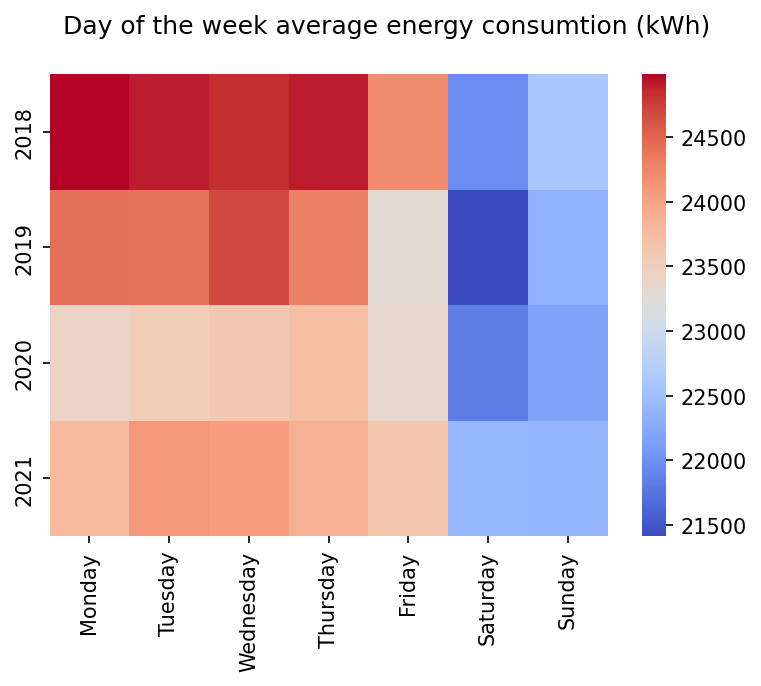

In [65]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_effects = df.groupby(['year', 'day_name'])['Total energy (kWh)'].mean()
dow_effects_unstack = dow_effects.unstack().T.reindex(day_names).T  
display(dow_effects_unstack)

plt.figure()
plot = sns.heatmap(dow_effects_unstack, cmap="coolwarm")
plt.suptitle('Day of the week average energy consumtion (kWh)')
plt.xlabel('')
plt.ylabel('')
plt.show()

**Insights**:

1. The energy consumption is _low_ on `Saturdays` and `Sundays` (as expected). This effect is _consistent_ throughout the whole period 2018-2021. Let's check if it is _consistent_ through different types of energies. 

Chilled Water (kWh)                                         \
day_name              Monday      Tuesday    Wednesday     Thursday   
year                                                                  
2018              170.504821   189.650769   183.169423   171.221538   
2019             1712.024760  1747.491557  1926.071538  1886.552548   
2020             2350.901635  2320.670096  2405.016038  2433.213113   
2021             2409.903269  2558.768205  2376.868590  2522.446859   

                                                Cooling (kWh)               \
day_name       Friday     Saturday       Sunday        Monday      Tuesday   
year                                                                         
2018       173.701154   163.556154   169.840577   4734.039286  5138.098846   
2019      1641.074471  1331.248606  1385.237019   5564.323654  5654.880566   
2020      2439.440721  2069.780192  2234.529471   5145.037788  5055.474327   
2021      2293.067372  2039.528269  1877.067244   6212.465128  5913.479615   

                       ... Heating Water (kWh)                            \
day_name    Wednesday  ...              Friday     Saturday       Sunday   
year                   ...                                                 
2018      5107.101538  ...         9205.349231  8531.417308  8415.765192   
2019      5893.162308  ...         7939.496394  6922.054231  7191.097788   
2020      5107.058585  ...         8803.757885  8212.509038  8486.366202   
2021      6141.127821  ...         8336.965385  8011.542372  8147.939872   

         Natural Gas (kWh)                                         \
day_name            Monday      Tuesday    Wednesday     Thursday   
year                                                                
2018            434.855000   472.899231   434.527308   445.780385   
2019            977.084167   934.928113   905.004327   923.317788   
2020           1006.990256  1148.206314  1006.415818  1178.630629   
2021            944.387051   943.232564   940.184060   942.102222   

                                                 
day_name       Friday     Saturday       Sunday  
year                                             
2018       427.368846   410.363333   410.773205  
2019       933.387500  1007.844327  1036.632853  
2020      1016.960737  1019.608750  1021.168590  
2021       939.683932   942.681581   944.543803  

[4 rows x 42 columns]

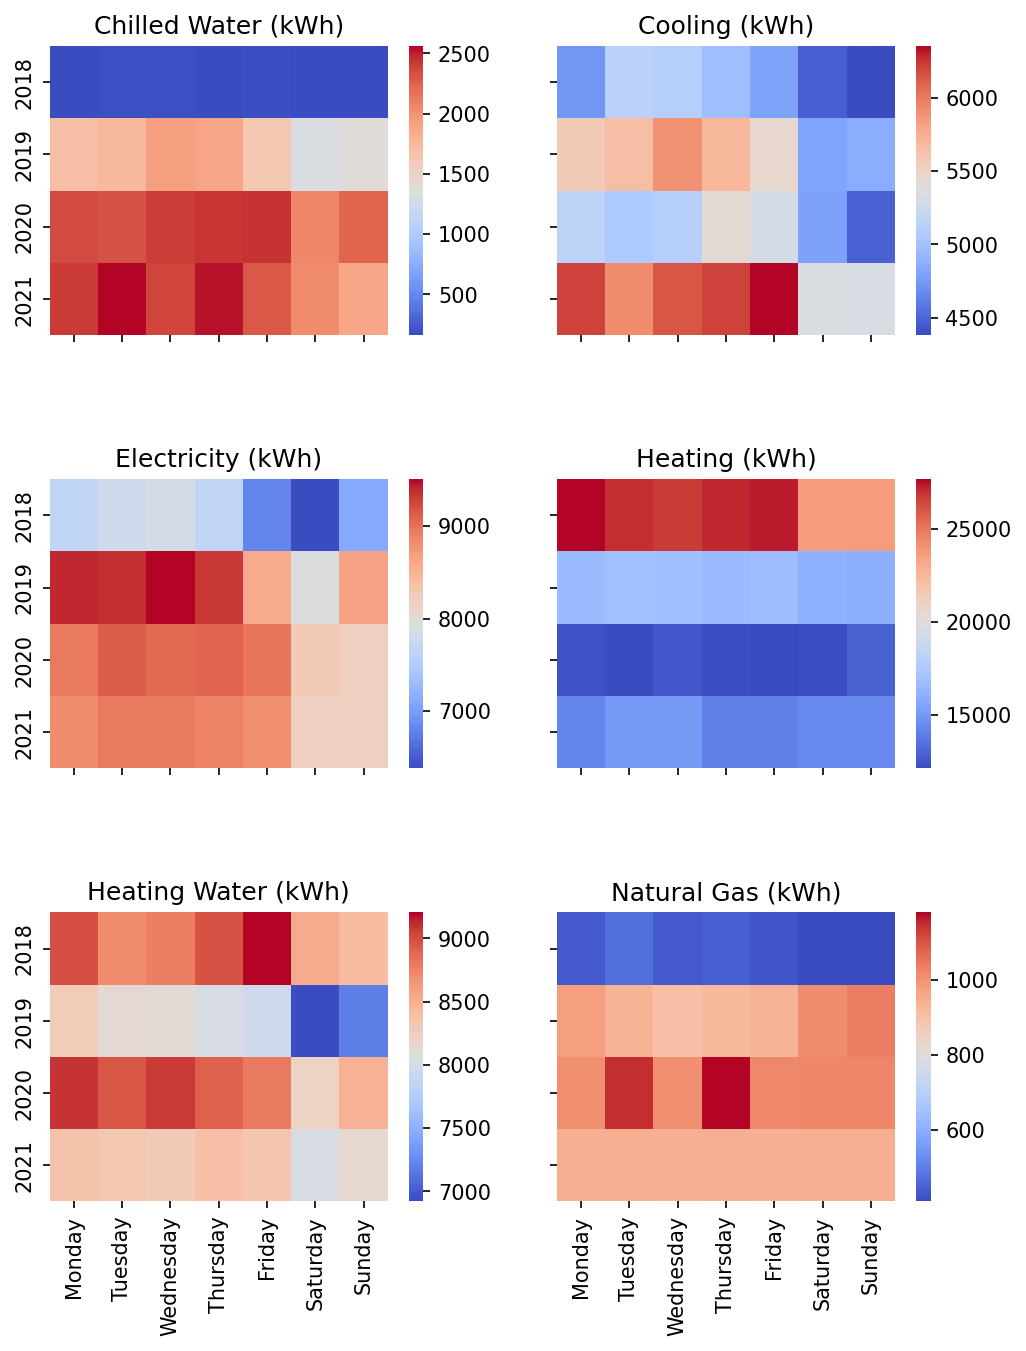

In [64]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.5)

dow_energy = df.groupby(['year', 'day_name'])[energy_cols].mean()
dow_energy_unstack = dow_energy.unstack().T.reindex(day_names, level=1).T 
display(dow_energy_unstack)

# loop through different energy cols and axes
for energy, ax in zip(energy_cols, axs.ravel()):
    # filter df for energy and plot on specified axes
    df_energy = dow_energy_unstack[energy]
    sns.heatmap(df_energy, cmap="coolwarm", ax=ax)
    # chart formatting
    ax.set_title(energy)
    ax.set_xlabel('')
    ax.set_ylabel('')
    # ax.set_xticklabels(day_names)

**Insights**:

1. The effect I explored above seems highly consistent through most types of energy: Chilled Water, Cooling, Electricity, Heating Water. 
    
    1a. The cleanest effect is in Electricity. 
    
Let's explore the weekend effect across Buildings.

Building,B1,B2,B3,B4,B5,B6
day_name,,,,,,
Monday,32757.452739,51305.492803,17805.135223,18372.082611,4204.678153,19440.937962
Tuesday,33044.695796,51768.736943,17825.319045,18407.247006,4169.368280,19280.714395
Wednesday,32877.934076,52113.402803,17994.588025,18624.296879,4186.813631,19249.674713
Thursday,32968.015287,51738.416688,17850.188917,18340.162102,4185.274777,19228.732293
Friday,31861.032308,51513.540256,17126.829872,17112.594167,4105.324167,19065.774744
Saturday,31311.566026,46929.392372,16283.565256,14844.395962,4176.726923,17521.547436
Sunday,32096.634936,46744.685513,17893.421218,15199.294295,4270.209936,17721.329103


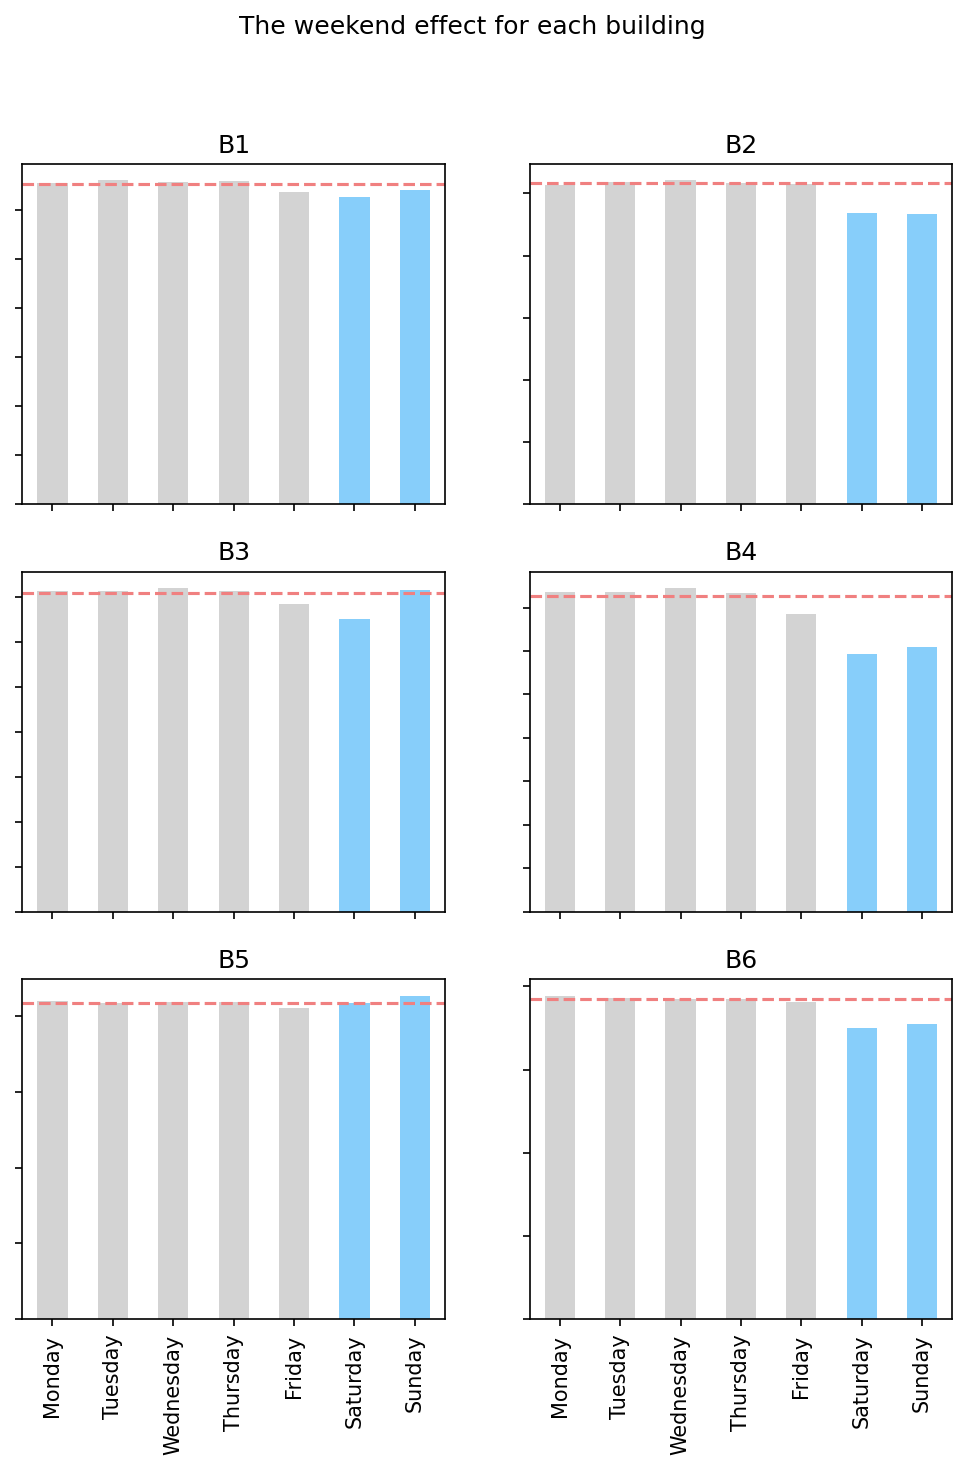

In [63]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), sharex=True)

dow_building = df.groupby(['Building', 'day_name'])['Total energy (kWh)'].mean()
dow_building_unstack = dow_building.unstack().T.reindex(day_names)
display(dow_building_unstack)

buildings = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']
# loop through different energy cols and axes
for building, ax in zip(buildings, axs.ravel()):
    # filter df for energy and plot on specified axes
    df_building = dow_building_unstack[building]
    clrs = ['lightskyblue' if x in ['Saturday', 'Sunday'] else 'lightgray' for x in df_building.index]
    df_building.plot.bar(ax=ax, color=clrs)
    # horizontal line average for five days Mon-Fr to compare with weekends
    ax.axhline(y=df_building.loc['Monday':'Friday'].mean(), color='lightcoral', linestyle='--') 
    # chart formatting
    ax.set_title(building)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels('')


plt.suptitle("The weekend effect for each building")
plt.show()

**Insights**:

1. The _most prominent_ weekend effect can be seen in buildings B2, B4, B6;

3. For Buldings 1,3 the effect is weak; 

2. No weekend effect for B5.

_Conclusions_: 

Combining this with Fig 2,3 Total energy usage, we can conclude that Building 5 consumes the least energy and has no weekend effect - this is probably a minor "technical" building - with no students.

Buildings 2,4,6 can be dedicated to studying, as the weekend effect is the most prominent - few students are studying during the weekend. Also, Building 2 consumes the most energy so it can be either Taylor Library or MacEwan Hall.

Regarding Buildings 1 and 3, one of the reasons why the weekend effect is weak is those might be dormitories. Some students can go home, and others can stay. It explains why it starts decreasing from Friday, then Saturday is low and bounces back on Sunday.